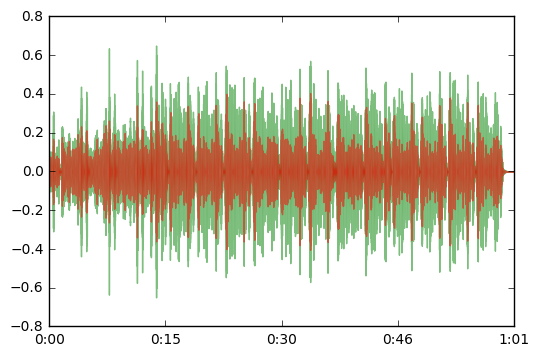

In [21]:
%matplotlib inline
import numpy as np
import librosa as lr

n_fft = 2048

# Load example audio file.
y, sr = lr.load(lr.util.example_audio_file(), sr=None)

# Take STFT of audio.
S = lr.stft(y, n_fft)

# Prepare filter banks.
M = lr.filters.mel(sr, n_fft)
M_pinv = np.linalg.pinv(lr.filters.mel(sr, n_fft))

# Transform STFT to mel scale.
S_mel = np.dot(M, S)

# Transform mel scaled spectrogram back to linear STFT.
S_reconstructed = np.dot(M_pinv, S_mel)

# Use original phase.
S_reconstructed = np.abs(S_reconstructed) * np.exp(1j * np.angle(S))

# Reconstruct audio from retransformed STFT.
reconstructed = lr.istft(S_reconstructed)

# Compare results in time domain. The original and reconstructed audio should look similar.
lr.display.waveplot(y, sr, alpha=0.5, color='g')
lr.display.waveplot(reconstructed, sr, alpha=0.5, color='r')                       